In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.datasets import make_classification
from sklearn import metrics

In [6]:
df = pd.read_csv('Diabetes_Dataset.csv')
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)
print(df.columns)
df.head()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


diabetes
0    87664
1     8482
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Diabetes Cases'}, xlabel='diabetes'>

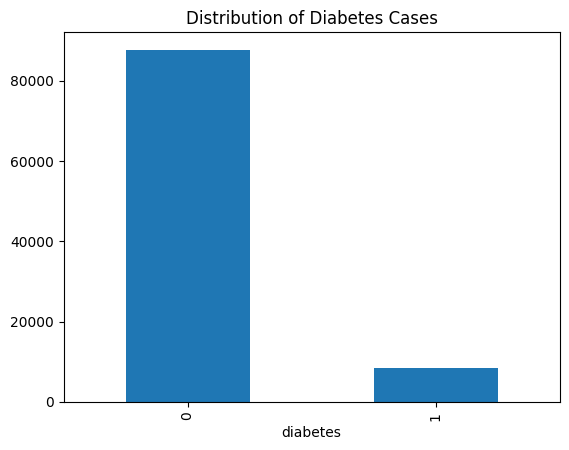

In [7]:
target_distribution = df['diabetes'].value_counts()
print(target_distribution)
target_distribution.plot(kind='bar', title='Distribution of Diabetes Cases')

In [8]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 76916
Testing set size: 19230


In [12]:
X = pd.get_dummies(df.drop('diabetes', axis=1))
y = df['diabetes']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(f'Accuracy on test set: {accuracy:.2f}')

Accuracy on test set: 0.96


In [14]:
X = pd.get_dummies(df.drop('diabetes', axis=1))
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(f'Accuracy on test set: {accuracy:.2f}')

Accuracy on test set: 0.96


In [19]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.2f}')

Accuracy on test set: 0.96


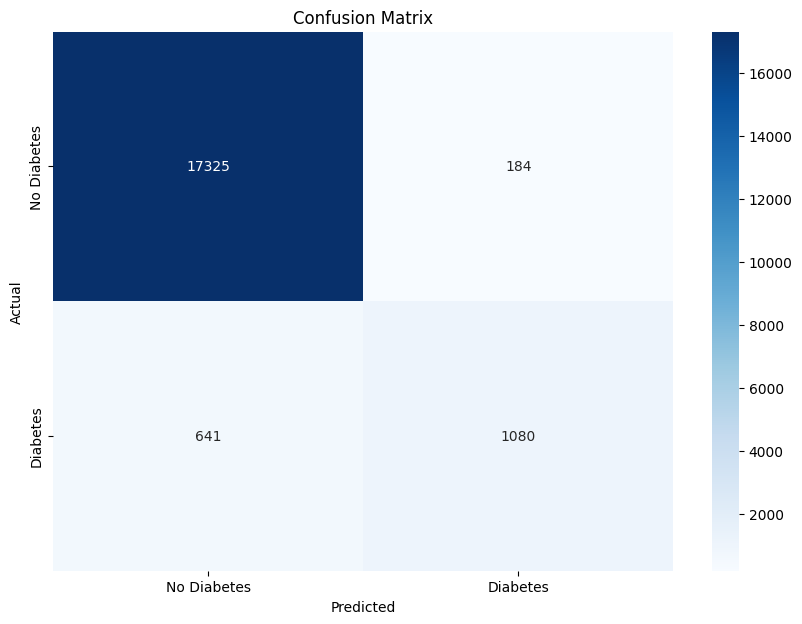

              precision    recall  f1-score   support

 No Diabetes       0.96      0.99      0.98     17509
    Diabetes       0.85      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
print(report)

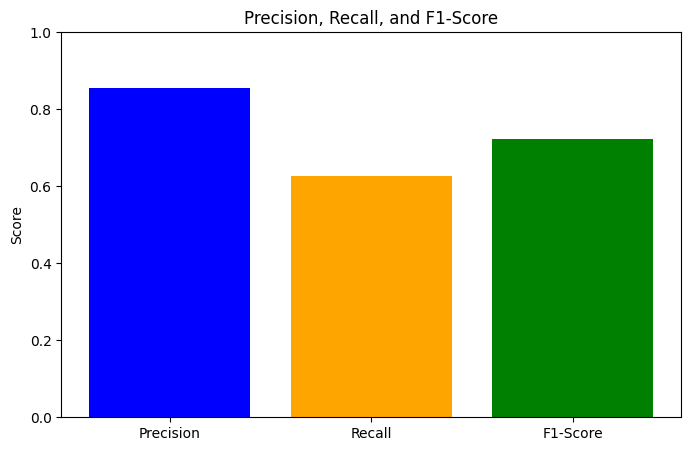

In [17]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
labels = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'orange', 'green'])
plt.title('Precision, Recall, and F1-Score')
plt.ylim([0, 1])
plt.ylabel('Score')
plt.show()

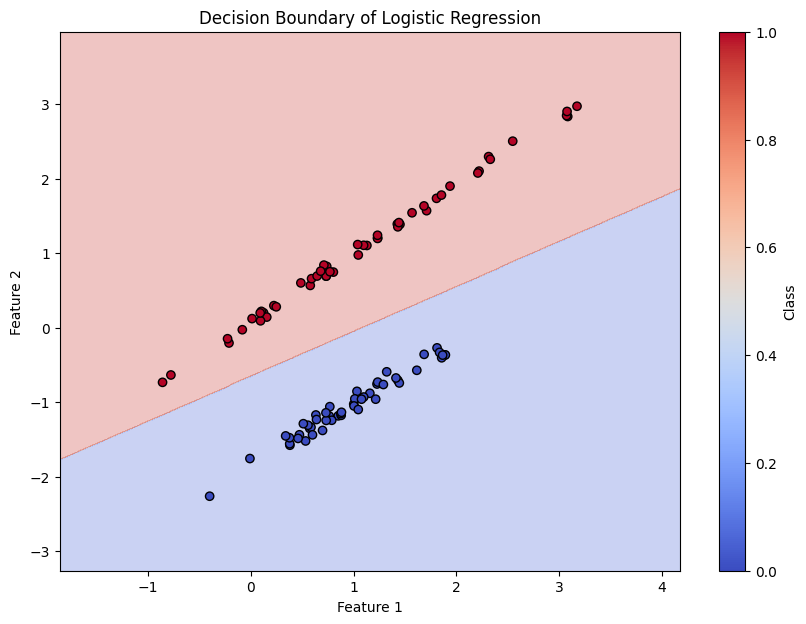

In [22]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
model = LogisticRegression()
model.fit(X, y)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title('Decision Boundary of Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

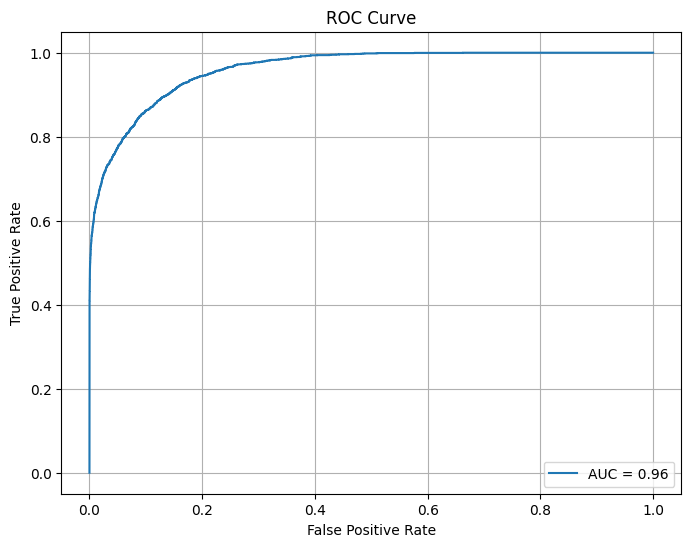

In [27]:
# Define the predictor variables and the response variable
X = df[['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']

# Convert categorical variables to numeric if necessary
X = pd.get_dummies(X)

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Instantiate the model
log_regression = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence

# Fit the model using the training data
log_regression.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_pred_proba = log_regression.predict_proba(X_test)[:, 1]

# Calculate ROC curve metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()